In [8]:
import imitation_chess
import chess
import numpy as np
import seaborn
import matplotlib.pyplot as plt

enginePath = 'weights/lc0'
weights = 'weights/weights_run1_21692.pb.gz'

In [2]:
E = imitation_chess.EngineHandler(enginePath, weights)

In [3]:
b = chess.Board('r1bq1rk1/1p2ppbp/2n2np1/3p4/p1P5/P2P1N2/1B1NPPPP/1R1QKB1R b K - 1 10')

In [26]:
probs = []
for i in range(10):
    print(2 ** (i + 5))
    m, p = E.getBoardProbs(b, movetime=2 ** (i + 5))
    probs.append(p)

32
64
128
256
512
1024
2048
4096
8192
16384


In [40]:
df = pandas.DataFrame({2 ** (i  + 5):{e[0] :e[1]  for e in p} for i, p in enumerate(probs)})

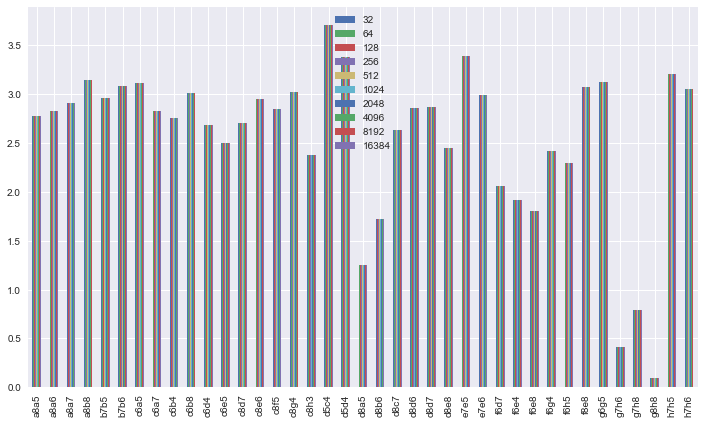

In [45]:
df.plot.bar(figsize = (12, 7))

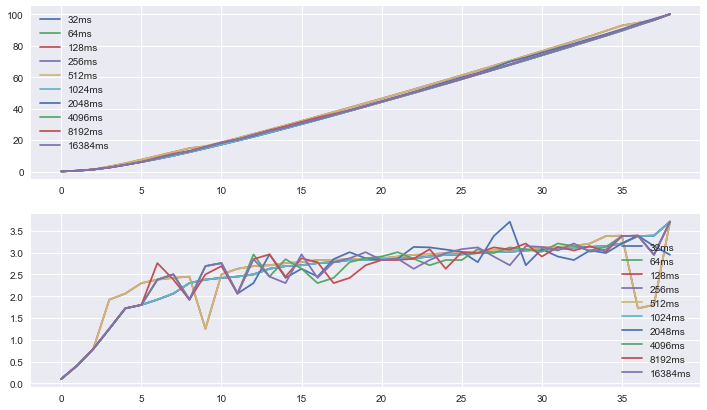

In [48]:
fgi, (ax1, ax2) = plt.subplots(nrows=2, figsize = (12, 7))
for i, p in enumerate(probs):
    ps = [e[1] for e in p]
    ls = [e[0] for e in p]
    ax1.plot(np.cumsum(ps), label = f"{2 ** (i + 5)}ms")
    ax2.plot(ps, label = f"{2 ** (i + 5)}ms")
ax1.legend()
ax2.legend()

In [50]:
ps = [e[10] for e in probs]
ps

[('f6g4', 2.42),
 ('f6g4', 2.42),
 ('c6e5', 2.5),
 ('f6g4', 2.42),
 ('c6e5', 2.5),
 ('f6g4', 2.42),
 ('c6b4', 2.76),
 ('c6b4', 2.76),
 ('c6d4', 2.69),
 ('c6b4', 2.76)]

In [4]:
E.getBoardProbs(b)

(BestMove(bestmove=Move.from_uci('d5c4'), ponder=None),
 [('g8h8', 0.1),
  ('g7h6', 0.41),
  ('g7h8', 0.79),
  ('d8a5', 1.25),
  ('d8b6', 1.72),
  ('f6e8', 1.8),
  ('f6e4', 1.92),
  ('f6d7', 2.06),
  ('f6h5', 2.3),
  ('c8h3', 2.38),
  ('f6g4', 2.42),
  ('d8e8', 2.45),
  ('c6e5', 2.5),
  ('d8c7', 2.63),
  ('c6d4', 2.69),
  ('c8d7', 2.71),
  ('c6b4', 2.76),
  ('a8a5', 2.78),
  ('c6a7', 2.83),
  ('a8a6', 2.83),
  ('c8f5', 2.85),
  ('d8d6', 2.86),
  ('d8d7', 2.87),
  ('a8a7', 2.91),
  ('c8e6', 2.95),
  ('b7b5', 2.96),
  ('e7e6', 2.99),
  ('c6b8', 3.01),
  ('c8g4', 3.02),
  ('h7h6', 3.05),
  ('f8e8', 3.07),
  ('b7b6', 3.08),
  ('c6a5', 3.12),
  ('g6g5', 3.13),
  ('a8b8', 3.15),
  ('h7h5', 3.21),
  ('d5d4', 3.38),
  ('e7e5', 3.39),
  ('d5c4', 3.71)])